# Проектная работа по модулю “Математика и статистика в Python”

1.Загрузить файл hr.csv.
2.Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import matplotlib.ticker as ticker
import seaborn as sns

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

# 1.Загрузить файл hr.csv.

In [4]:
data = pd.read_csv('HR.csv')
data.head(2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


satisfaction_level -  уровень удовлетворенности
last_evaluation  -последняя оценка
number_project - количество проектов
average_montly_hours - среднее количество часов в месяц
time_spend_company - стаж работы в компании
Work_accident - несчастные случаи
left -покинули компанию
promotion_last_5years - повышения за последние 5 лет
sales - подразделения
salary  -уровень заработной платы

## 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

Мы использовали функцию info(). 
В таблице данных всего 14 999 строк, содержиться 2 колонки с типом данных float, 6 колонок с типом данных  int, 2 колонки с типом данных object.
Все колонки имеют одинаковое количество строк. это количество совпадает с общим количеством строк, из чего можно сделать вывод, что у нас нет объектов, способных помешать нам сделать анализ по основным стат параметрам


In [12]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
data.select_dtypes(include="object").mode()

,sales,salary
0,sales,low


## 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

In [15]:
corr_matrix = data.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


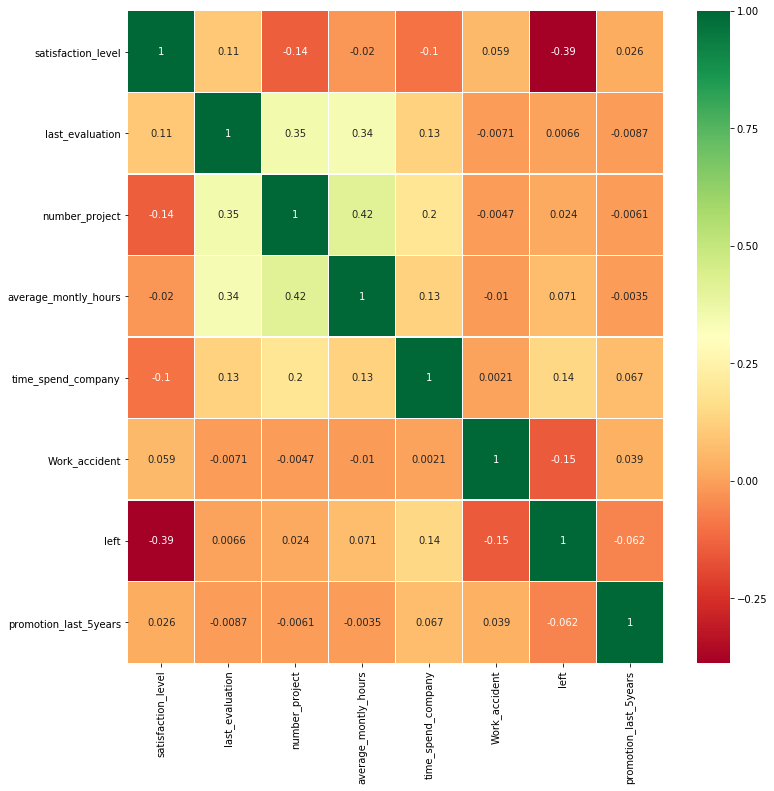

In [16]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

можно говорить о сильной обратной корреляции между satisfaction_level и left, а также о явной прямой корреляции между number_project и average_montly_hours

## Визуализировать несколько взаимосвязей между переменными.

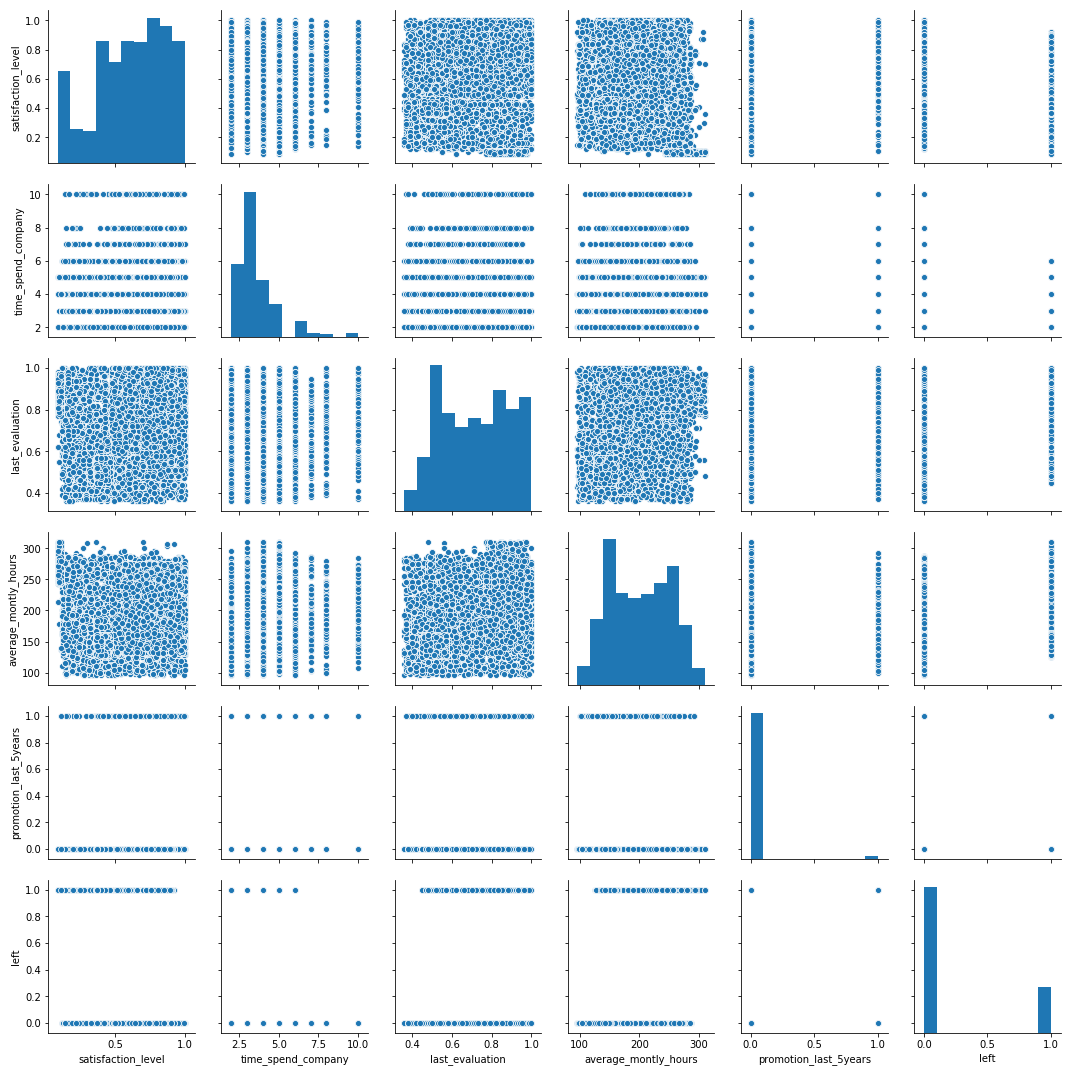

In [13]:
sns.pairplot(data, vars =('satisfaction_level', 'time_spend_company', 'last_evaluation', 'average_montly_hours', 'promotion_last_5years', 'left'), kind = 'scatter')


## 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Уровени удовлетворенности у сотрудников, которые работают в компании, и у сотрудников, которые покинули ее, отличаются


In [122]:
data_left = data[data['left']==1]['satisfaction_level'].sample(3000)
data_in = data[data['left']==0]['satisfaction_level'].sample(3000)

In [20]:
statistics.variance(data_left), statistics.variance(data_in)

(0.07073021300433478, 0.04780682409692119)

In [123]:
sts.ttest_ind(data_in, data_left)

Ttest_indResult(statistic=36.681461071018525, pvalue=5.940709418739697e-266)

pvalue очень низкий, значит наша гипотеза не верна

### Уровень удовлетворенности зависит от уровня зарплаты

In [27]:
data_high = data[data['salary']=='high']['satisfaction_level'].sample(1000)
data_low = data[data['salary']=='low']['satisfaction_level'].sample(1000)

In [28]:
statistics.variance(data_high), statistics.variance(data_low)

(0.050264536136136136, 0.06262421781781782)

In [29]:
sts.ttest_ind(data_high, data_low)

Ttest_indResult(statistic=4.489448968860574, pvalue=7.547677071870384e-06)

pvalue очень маленький, значит наша гипотеза не верна

### Сотрудники бухгалтерии работают в компании дольше, чем сотрудники отдела продаж

In [131]:
d_prof_ac = data[data['sales']=='accounting']['time_spend_company'].sample(700)
d_prof_sal = data[data['sales']=='sales']['time_spend_company'].sample(700)

In [31]:
statistics.variance(d_prof_ac), statistics.variance(d_prof_sal)

(1.9355487431023914, 2.1744757817290004)

In [132]:
sts.ttest_ind(d_prof_ac, d_prof_sal)

Ttest_indResult(statistic=0.3650710829697932, pvalue=0.7151135666060808)

pvalue достаточно высокий, значит наша гипотеза верна

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [12]:
data_staff = data[data['left']==0]['sales'].value_counts()
data_staff

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

# 7.Показать распределение сотрудников по зарплатам

In [133]:
# создаем отдельный дата сет для расчета распределения
data_wages = data
data.loc[data_wages['salary']=='low','wages'] = 1
data.loc[data_wages['salary']=='medium','wages'] = 2
data.loc[data_wages['salary']=='high','wages'] = 3
data.loc[data_wages['sales']=='sales','departament'] = 1
data.loc[data_wages['sales']=='technical','departament'] = 2
data.loc[data_wages['sales']=='support','departament'] = 3
data.loc[data_wages['sales']=='IT','departament'] = 4
data.loc[data_wages['sales']=='product_mng','departament'] = 5
data.loc[data_wages['sales']=='RandD','departament'] = 6
data.loc[data_wages['sales']=='marketing','departament'] = 7
data.loc[data_wages['sales']=='accounting','departament'] = 8
data.loc[data_wages['sales']=='management','departament'] = 9
data.loc[data_wages['sales']=='hr','departament'] = 10

In [134]:
# оставляем только тех сотрудников, кто работает в настоящий момент
data_wages_1 = data_wages[data_wages.left==0]

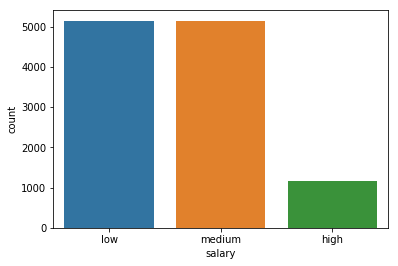

In [47]:
df = data_wages_1[['salary', 'left']]
sns.countplot(x= 'salary', data = df)

#  8.Показать распределение сотрудников по зарплатам совместно с департаментами.

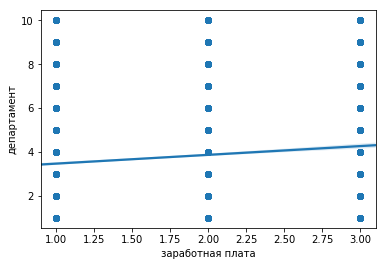

In [51]:
wages = data_wages['wages']
departament = data_wages['departament']
sns.regplot(x= wages, y=departament,data=data_wages, fit_reg=True)
plt.xlabel('заработная плата')
plt.ylabel('департамент')
plt.grid(False)
plt.show()

# 9.Сколько сотрудников покинули компанию.

In [102]:
data['left'].sum()

3571

In [68]:
# по подразделениям
data_out = data[data['left']==1]['sales'].value_counts()
data_out

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: sales, dtype: int64

## 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

ранее мы уже выснили, что уровень удовлетворенности у ушедших сотрудников и работающих одинаков, поэтому не будем использвать эту гипотезу
### Гипотеза 1 : есть отличия в количестве проектов у работающих в компании сотрудников и ушедших из нее

In [135]:
df_left = data[data['left']==1]['number_project'].sample(3000)
df_in = data[data['left']==0]['number_project'].sample(3000)

In [54]:
statistics.variance(df_left), statistics.variance(df_in)

(3.326208736245415, 0.9439785484050239)

In [136]:
sts.ttest_ind(df_left, df_in, equal_var=False)

Ttest_indResult(statistic=2.8098722811670003, pvalue=0.004976913772788488)

pvalue для данной гипотезы не высокое, значит фактор количества проектов оказывает слабое влияние на желание сотрудников работать в компании

### Гипотеза 2: есть разница в заработной плате у работающих в компании сотрудников и ушедших из нее

In [137]:
df_left_1 = data_wages[data_wages['left']==1]['wages'].sample(3000)
df_in_1 = data_wages[data_wages['left']==0]['wages'].sample(3000)

In [138]:
statistics.variance(df_left_1), statistics.variance(df_in_1)

(0.2870769145270646, 0.4404106924530399)

In [139]:
sts.ttest_ind(df_left_1, df_in_1,equal_var=False)

Ttest_indResult(statistic=-15.797302511791555, pvalue=4.6248304810569456e-55)

pvalue крайне маленький значит фактор заработной платы на является решающим при уходе из компании

### Гипотеза 3: есть отличия в количестве рабочих часов работающих в компании сотрудников и ушедших из нее

In [59]:
df_left_2 = data[data['left']==1]['average_montly_hours'].sample(3000)
df_in_2 = data[data['left']==0]['average_montly_hours'].sample(3000)

In [60]:
statistics.variance(df_left_2), statistics.variance(df_in_2)

(3720.3345310659106, 2082.9847282427477)

In [61]:
sts.ttest_ind(df_left_2, df_in_2,equal_var=False)

Ttest_indResult(statistic=6.659757740052189, pvalue=3.0070637039481303e-11)

### Гипотеза 4 : есть отличия в  рабочем стаже работающих в компании сотрудников и ушедших из нее

In [140]:
df_left_3 = data[data['left']==1]['time_spend_company'].sample(3000)
df_in_3 = data[data['left']==0]['time_spend_company'].sample(3000)

In [70]:
statistics.variance(df_left_3), statistics.variance(df_in_3)

(0.9556074246971212, 2.3012004001333777)

In [141]:
sts.ttest_ind(df_left_3, df_in_3, equal_var=False)

Ttest_indResult(statistic=13.674918389932548, pvalue=8.073045579104292e-42)

pvalue для данной гипотезы крайне высок, значит фактор рабочего стажа оказывает существенное влияние на желание сотрудников работать в компании

### Гипотеза 5 : есть отличия в  последней оценке работающих в компании сотрудников и ушедших из нее

In [176]:
df_left_4 = data[data['left']==1]['last_evaluation'].sample(3000)
df_in_4 = data[data['left']==0]['last_evaluation'].sample(3000)

In [143]:
statistics.variance(df_left_4), statistics.variance(df_in_4)

(0.038956193353339996, 0.026144887184617095)

In [178]:
sts.ttest_ind(df_left_4, df_in_4, equal_var=False)

Ttest_indResult(statistic=0.36082385397805433, pvalue=0.7182443022670143)

pvalue для данной гипотезы высок, значит фактор последней оценки оказывает влияние на присутствие сотрудников в компании

### Формирование вывода по гипотезам

таким образом из всех предложенных гипотез только одна имеет достаточно высокий pvalue. таким образом можно говорить что именно критерий последняя оценка является причиной почему сотрудники могут покидать компанию 